## 1. Setup and Imports

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

# Create output directory
import os
os.makedirs('../results/adf_test', exist_ok=True)
print("\n✓ Output directory ready")

✓ All libraries imported successfully!
NumPy version: 2.3.4
Pandas version: 2.3.3

✓ Output directory ready


## 2. Load Time Series Data

Using the same time series data: **Y = [50, 54, 56, 53, 52, 55, 57]**

In [2]:
# Define the time series data
Y = [50, 54, 56, 53, 52, 55, 57]

# Convert to pandas Series with time index
time_index = pd.date_range(start='2024-01-01', periods=len(Y), freq='D')
ts_data = pd.Series(Y, index=time_index, name='Value')

print("Time Series Data:")
print("="*50)
print(ts_data)
print("\nData Summary:")
print(f"  Length: {len(ts_data)}")
print(f"  Mean: {ts_data.mean():.4f}")
print(f"  Std Dev: {ts_data.std():.4f}")
print(f"  Min: {ts_data.min():.4f}")
print(f"  Max: {ts_data.max():.4f}")

Time Series Data:
2024-01-01    50
2024-01-02    54
2024-01-03    56
2024-01-04    53
2024-01-05    52
2024-01-06    55
2024-01-07    57
Freq: D, Name: Value, dtype: int64

Data Summary:
  Length: 7
  Mean: 53.8571
  Std Dev: 2.4103
  Min: 50.0000
  Max: 57.0000


## 3. Visualize the Time Series

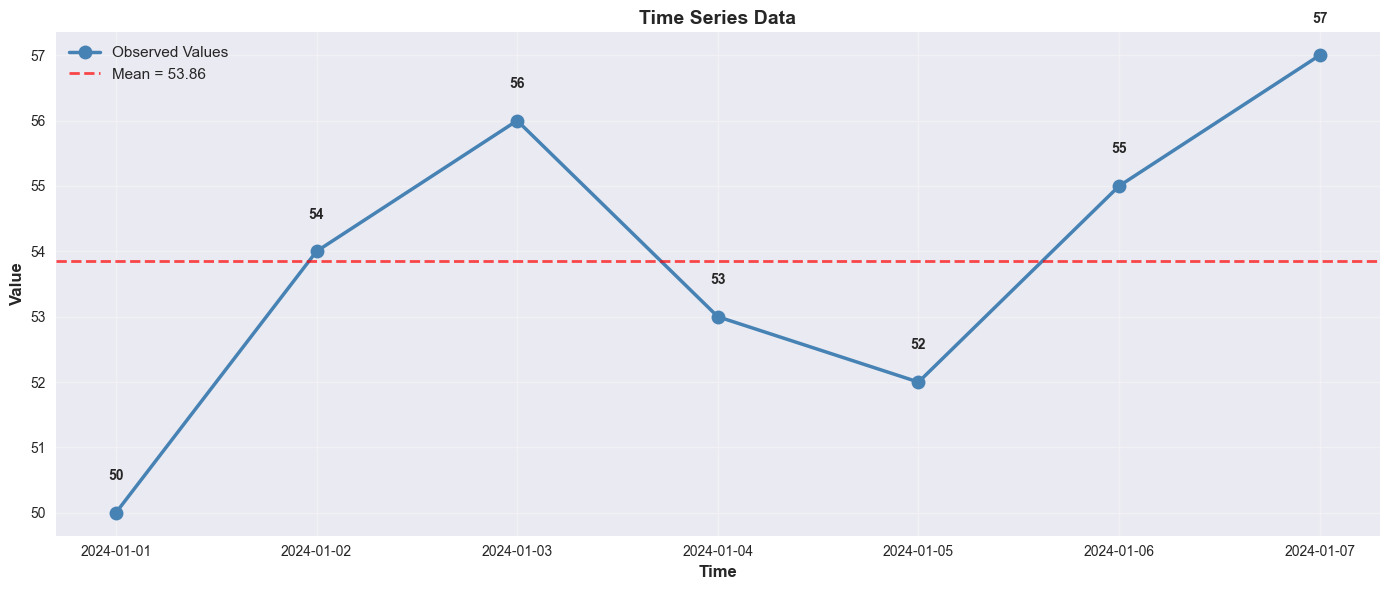

✓ Time series plot saved


In [3]:
# Plot the time series
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(ts_data.index, ts_data.values, marker='o', linestyle='-', 
        linewidth=2.5, markersize=10, color='steelblue', label='Observed Values')
ax.axhline(y=ts_data.mean(), color='red', linestyle='--', 
           linewidth=2, alpha=0.7, label=f'Mean = {ts_data.mean():.2f}')

# Add value labels
for i, (date, value) in enumerate(zip(ts_data.index, ts_data.values)):
    ax.text(date, value + 0.5, str(value), ha='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Value', fontsize=12, fontweight='bold')
ax.set_title('Time Series Data', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/adf_test/time_series_plot.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Time series plot saved")

## 4. Perform Augmented Dickey-Fuller Test

### 4.1 ADF Test with Different Regression Models

The ADF test can be performed with three different regression specifications:
1. **'c'** (constant): Includes only a constant term
2. **'ct'** (constant and trend): Includes both constant and linear trend
3. **'n'** (no constant): Neither constant nor trend

In [4]:
print("="*70)
print("AUGMENTED DICKEY-FULLER (ADF) TEST RESULTS")
print("="*70)

# Test with different specifications
regression_types = ['c', 'ct', 'n']
regression_names = {
    'c': 'Constant Only',
    'ct': 'Constant and Trend',
    'n': 'No Constant or Trend'
}

adf_results = {}

for reg_type in regression_types:
    print(f"\n{'='*70}")
    print(f"ADF Test: {regression_names[reg_type]} (regression='{reg_type}')")
    print("="*70)
    
    # Perform ADF test
    result = adfuller(ts_data, regression=reg_type, autolag='AIC')
    
    # Extract results
    adf_statistic = result[0]
    p_value = result[1]
    n_lags = result[2]
    n_obs = result[3]
    critical_values = result[4]
    
    # Store results
    adf_results[reg_type] = {
        'statistic': adf_statistic,
        'p_value': p_value,
        'lags': n_lags,
        'n_obs': n_obs,
        'critical_values': critical_values
    }
    
    # Print results
    print(f"\nTest Results:")
    print(f"  ADF Statistic: {adf_statistic:.6f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Number of lags used: {n_lags}")
    print(f"  Number of observations: {n_obs}")
    
    print(f"\n  Critical Values:")
    for key, value in critical_values.items():
        print(f"    {key}: {value:.4f}")
    
    # Interpretation
    print(f"\n  📊 Interpretation:")
    if p_value < 0.05:
        print(f"    ✓ REJECT null hypothesis (p-value = {p_value:.6f} < 0.05)")
        print(f"    → The series is STATIONARY")
    else:
        print(f"    ✗ FAIL TO REJECT null hypothesis (p-value = {p_value:.6f} ≥ 0.05)")
        print(f"    → The series is NON-STATIONARY (has a unit root)")
    
    # Compare with critical values
    print(f"\n  📈 Comparison with Critical Values:")
    for level, cv in critical_values.items():
        if adf_statistic < cv:
            print(f"    ✓ ADF Statistic ({adf_statistic:.4f}) < {level} Critical Value ({cv:.4f})")
            print(f"      → Reject H₀ at {level} significance level")
        else:
            print(f"    ✗ ADF Statistic ({adf_statistic:.4f}) > {level} Critical Value ({cv:.4f})")
            print(f"      → Cannot reject H₀ at {level} significance level")

print(f"\n{'='*70}")
print("ADF TEST COMPLETED")
print("="*70)

AUGMENTED DICKEY-FULLER (ADF) TEST RESULTS

ADF Test: Constant Only (regression='c')

Test Results:
  ADF Statistic: -3.035448
  P-value: 0.031714
  Number of lags used: 1
  Number of observations: 5

  Critical Values:
    1%: -6.0451
    5%: -3.9293
    10%: -2.9868

  📊 Interpretation:
    ✓ REJECT null hypothesis (p-value = 0.031714 < 0.05)
    → The series is STATIONARY

  📈 Comparison with Critical Values:
    ✗ ADF Statistic (-3.0354) > 1% Critical Value (-6.0451)
      → Cannot reject H₀ at 1% significance level
    ✗ ADF Statistic (-3.0354) > 5% Critical Value (-3.9293)
      → Cannot reject H₀ at 5% significance level
    ✓ ADF Statistic (-3.0354) < 10% Critical Value (-2.9868)
      → Reject H₀ at 10% significance level

ADF Test: Constant and Trend (regression='ct')

Test Results:
  ADF Statistic: -1.887581
  P-value: 0.661080
  Number of lags used: 0
  Number of observations: 6

  Critical Values:
    1%: -6.8784
    5%: -4.6033
    10%: -3.7706

  📊 Interpretation:
    ✗ 

## 5. Visualize ADF Test Results

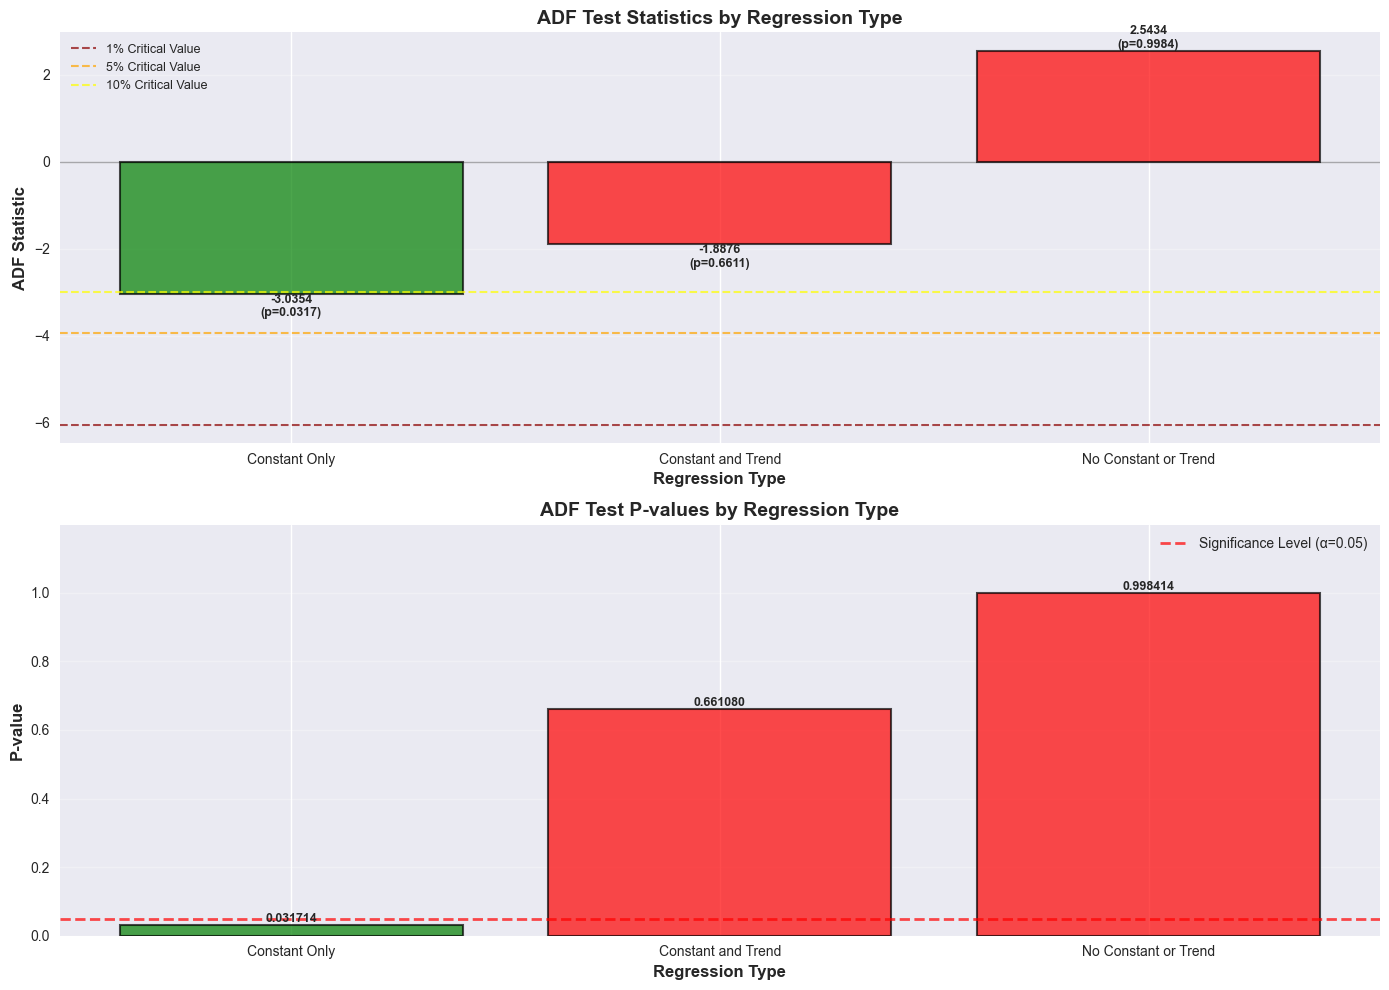

✓ ADF test comparison visualization saved


In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: ADF Statistics Comparison
regression_labels = [regression_names[rt] for rt in regression_types]
adf_stats = [adf_results[rt]['statistic'] for rt in regression_types]
p_values = [adf_results[rt]['p_value'] for rt in regression_types]

x_pos = np.arange(len(regression_types))
colors = ['green' if p < 0.05 else 'red' for p in p_values]

bars = axes[0].bar(x_pos, adf_stats, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Regression Type', fontsize=12, fontweight='bold')
axes[0].set_ylabel('ADF Statistic', fontsize=12, fontweight='bold')
axes[0].set_title('ADF Test Statistics by Regression Type', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(regression_labels)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.3)
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, stat, pval) in enumerate(zip(bars, adf_stats, p_values)):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{stat:.4f}\n(p={pval:.4f})',
                ha='center', va='bottom' if height > 0 else 'top', fontsize=9, fontweight='bold')

# Add critical value reference lines for 'c' (constant) regression
cv_1pct = adf_results['c']['critical_values']['1%']
cv_5pct = adf_results['c']['critical_values']['5%']
cv_10pct = adf_results['c']['critical_values']['10%']

axes[0].axhline(y=cv_1pct, color='darkred', linestyle='--', linewidth=1.5, alpha=0.7, label='1% Critical Value')
axes[0].axhline(y=cv_5pct, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='5% Critical Value')
axes[0].axhline(y=cv_10pct, color='yellow', linestyle='--', linewidth=1.5, alpha=0.7, label='10% Critical Value')
axes[0].legend(fontsize=9, loc='best')

# Plot 2: P-values Comparison
bars2 = axes[1].bar(x_pos, p_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Regression Type', fontsize=12, fontweight='bold')
axes[1].set_ylabel('P-value', fontsize=12, fontweight='bold')
axes[1].set_title('ADF Test P-values by Regression Type', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(regression_labels)
axes[1].axhline(y=0.05, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Significance Level (α=0.05)')
axes[1].set_ylim([0, max(p_values) * 1.2])
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].legend(fontsize=10, loc='best')

# Add value labels on bars
for bar, pval in zip(bars2, p_values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{pval:.6f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/adf_test/adf_test_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ ADF test comparison visualization saved")

## 6. Summary and Conclusions

In [6]:
print("="*70)
print("ADF TEST ANALYSIS SUMMARY")
print("="*70)

print("\n📊 DATA:")
print("-" * 50)
print(f"  Time Series: {list(ts_data.values)}")
print(f"  Number of observations: {len(ts_data)}")
print(f"  Mean: {ts_data.mean():.4f}")
print(f"  Standard Deviation: {ts_data.std():.4f}")

print("\n🔬 ADF TEST RESULTS SUMMARY:")
print("-" * 50)

for reg_type in regression_types:
    result = adf_results[reg_type]
    print(f"\n  {regression_names[reg_type]} (regression='{reg_type}'):")
    print(f"    ADF Statistic: {result['statistic']:.6f}")
    print(f"    P-value: {result['p_value']:.6f}")
    print(f"    Lags used: {result['lags']}")
    
    if result['p_value'] < 0.05:
        print(f"    Decision: ✓ STATIONARY (reject H₀)")
    else:
        print(f"    Decision: ✗ NON-STATIONARY (fail to reject H₀)")

print("\n💡 OVERALL CONCLUSION:")
print("-" * 50)

stationary_count = sum(1 for rt in regression_types if adf_results[rt]['p_value'] < 0.05)

if stationary_count == len(regression_types):
    print("  ✓ The time series is STATIONARY across all regression specifications.")
    print("  → The series does not have a unit root.")
    print("  → The series can be modeled using standard time series methods.")
elif stationary_count == 0:
    print("  ✗ The time series is NON-STATIONARY across all regression specifications.")
    print("  → The series has a unit root.")
    print("  → Consider differencing or transformation to achieve stationarity.")
else:
    print("  ⚠ Mixed results across different regression specifications.")
    print(f"  → {stationary_count} out of {len(regression_types)} tests indicate stationarity.")
    print("  → The choice of regression specification affects the conclusion.")
    print("  → Consider the data characteristics when selecting the appropriate model.")

print("\n📚 INTERPRETATION GUIDE:")
print("-" * 50)
print("  • ADF Statistic: More negative values provide stronger evidence")
print("    against the null hypothesis of a unit root.")
print("  • P-value < 0.05: Reject H₀ → Series is stationary")
print("  • P-value ≥ 0.05: Fail to reject H₀ → Series has a unit root")
print("  • If ADF Statistic < Critical Value: Reject H₀ at that significance level")

print("\n📁 OUTPUT FILES:")
print("-" * 50)
print("  • time_series_plot.png")
print("  • adf_test_comparison.png")
print("  • adf_test_results.txt")

print("\n" + "="*70)
print("✅ ADF TEST ANALYSIS COMPLETE!")
print("="*70)

ADF TEST ANALYSIS SUMMARY

📊 DATA:
--------------------------------------------------
  Time Series: [np.int64(50), np.int64(54), np.int64(56), np.int64(53), np.int64(52), np.int64(55), np.int64(57)]
  Number of observations: 7
  Mean: 53.8571
  Standard Deviation: 2.4103

🔬 ADF TEST RESULTS SUMMARY:
--------------------------------------------------

  Constant Only (regression='c'):
    ADF Statistic: -3.035448
    P-value: 0.031714
    Lags used: 1
    Decision: ✓ STATIONARY (reject H₀)

  Constant and Trend (regression='ct'):
    ADF Statistic: -1.887581
    P-value: 0.661080
    Lags used: 0
    Decision: ✗ NON-STATIONARY (fail to reject H₀)

  No Constant or Trend (regression='n'):
    ADF Statistic: 2.543446
    P-value: 0.998414
    Lags used: 2
    Decision: ✗ NON-STATIONARY (fail to reject H₀)

💡 OVERALL CONCLUSION:
--------------------------------------------------
  ⚠ Mixed results across different regression specifications.
  → 1 out of 3 tests indicate stationarity.
  → T

## 7. Save Results to File

In [ ]:
# Save ADF test results to text file
results_filename = '../results/adf_test/adf_test_results.txt'

with open(results_filename, 'w') as f:
    f.write("AUGMENTED DICKEY-FULLER (ADF) TEST RESULTS\n")
    f.write("=" * 70 + "\n\n")
    
    f.write("DATA:\n")
    f.write(f"Time Series: {list(ts_data.values)}\n")
    f.write(f"Number of observations: {len(ts_data)}\n")
    f.write(f"Mean: {ts_data.mean():.4f}\n")
    f.write(f"Std Dev: {ts_data.std():.4f}\n\n")
    
    for reg_type in regression_types:
        result = adf_results[reg_type]
        f.write("=" * 70 + "\n")
        f.write(f"ADF TEST: {regression_names[reg_type]} (regression='{reg_type}')\n")
        f.write("=" * 70 + "\n\n")
        
        f.write(f"ADF Statistic: {result['statistic']:.6f}\n")
        f.write(f"P-value: {result['p_value']:.6f}\n")
        f.write(f"Number of lags: {result['lags']}\n")
        f.write(f"Number of observations: {result['n_obs']}\n\n")
        
        f.write("Critical Values:\n")
        for level, cv in result['critical_values'].items():
            f.write(f"  {level}: {cv:.4f}\n")
        
        f.write("\nDecision:\n")
        if result['p_value'] < 0.05:
            f.write("  REJECT null hypothesis (p-value < 0.05)\n")
            f.write("  → The series is STATIONARY\n\n")
        else:
            f.write("  FAIL TO REJECT null hypothesis (p-value ≥ 0.05)\n")
            f.write("  → The series is NON-STATIONARY (has a unit root)\n\n")
    
    f.write("=" * 70 + "\n")
    f.write("OVERALL CONCLUSION\n")
    f.write("=" * 70 + "\n\n")
    
    stationary_count = sum(1 for rt in regression_types if adf_results[rt]['p_value'] < 0.05)
    
    if stationary_count == len(regression_types):
        f.write("The time series is STATIONARY across all regression specifications.\n")
    elif stationary_count == 0:
        f.write("The time series is NON-STATIONARY across all regression specifications.\n")
    else:
        f.write(f"Mixed results: {stationary_count}/{len(regression_types)} tests indicate stationarity.\n")

print(f"✓ ADF test results saved to: {results_filename}")

# Save results as CSV
csv_filename = '../results/adf_test/adf_test_summary.csv'
results_df = pd.DataFrame([
    {
        'Regression Type': regression_names[rt],
        'ADF Statistic': adf_results[rt]['statistic'],
        'P-value': adf_results[rt]['p_value'],
        'Lags Used': adf_results[rt]['lags'],
        'Observations': adf_results[rt]['n_obs'],
        'Critical Value 1%': adf_results[rt]['critical_values']['1%'],
        'Critical Value 5%': adf_results[rt]['critical_values']['5%'],
        'Critical Value 10%': adf_results[rt]['critical_values']['10%'],
        'Stationary': 'Yes' if adf_results[rt]['p_value'] < 0.05 else 'No'
    }
    for rt in regression_types
])

results_df.to_csv(csv_filename, index=False)
print(f"✓ ADF test summary saved to: {csv_filename}")

print("\n✅ All results saved successfully!")